**Grade Notebook Project**


Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Load the Dataset**


### **Load the roster dataset** 

In [ ]:
roster=pd.read_csv("/roster.csv",
                   converters={"NetID": str.lower, "Email Address": str.lower},
                   index_col="NetID",
                   usecols=["NetID","Email Address","Section"]
                  )
roster.head()

,Email Address,Section
NetID,,
wxb12345,woody.barrera_jr@univ.edu,1
mxl12345,malaika.lambert@univ.edu,2
txj12345,traci.joyce@univ.edu,1
jgf12345,john.g.2.flower@univ.edu,3
smj00936,stacy.johnson@univ.edu,2


###Load the Homework and exam grade dataset

In [ ]:
hw_exm_grade = pd.read_csv("/hw_exam_grades.csv",
                            converters={"SID":str.lower},
                            index_col="SID",
                            usecols= lambda x: "Submission" not in x
                          )
hw_exm_grade

,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
SID,,,,,,,,,,,,,,,,,,,,,
axl60952,Aaron,Lester,68.0,80,74,80,77,80,89,100,...,42,60,41,60,79,100,63,100,68,100
amc28428,Adam,Cooper,80.0,80,78,80,78,80,87,100,...,45,60,53,60,65,100,63,100,90,100
axc64717,Alec,Curry,69.0,80,76,80,66,80,87,100,...,58,60,42,60,65,100,78,100,83,100
akr14831,Alexander,Rodriguez,50.0,80,54,80,74,80,75,100,...,38,60,47,60,97,100,97,100,81,100
axd11293,Amber,Daniels,54.0,80,57,80,77,80,95,100,...,46,60,59,60,68,100,95,100,88,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
txw75701,Travis,Washington,64.0,80,67,80,56,80,92,100,...,40,60,52,60,94,100,74,100,68,100
tbr17292,Troy,Raymond,50.0,80,59,80,79,80,98,100,...,45,60,49,60,91,100,67,100,100,100
vkb66346,Victoria,Boyd,58.0,80,61,80,75,80,99,100,...,40,60,50,60,68,100,93,100,69,100


### Load the quiz dataset


In [ ]:
quiz_grade=pd.DataFrame()
for i in range(1,6):
  quiz=pd.read_csv("/quiz_{}_grades.csv".format(i),
                    converters={"Email":str.lower},
                    index_col="Email",
                    usecols=["Email","Grade"]                 
                  ).rename(columns={"Grade":"Quiz_{}".format(i)})
  quiz_grade=pd.concat([quiz_grade,quiz],axis=1)  
quiz_grade.head()                            

,Quiz_1,Quiz_2,Quiz_3,Quiz_4,Quiz_5
Email,,,,,
richard.bennett@univ.edu,10,6,9,8,10
timothy.parker@univ.edu,9,14,13,14,10
carol.reyes@univ.edu,5,15,8,14,6
brooke.powers@univ.edu,6,10,17,10,8
michael.taylor@univ.edu,5,15,13,12,5


## **Merging the dataset**

***Merging is done in two Steps***


1.Merge roster and hw_exm_grades together into a new DataFrame called final_data.

2.Merge final_data and quiz_grades together

In [ ]:
# The datasets "roster and hw_exm_grades" are merge on the left and right index
final_data=pd.merge(roster,hw_exm_grade,left_index=True, right_index=True)
final_data.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,45,60,46,60,86,100,62,100,90,100
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,45,60,37,60,60,100,91,100,93,100
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,59,60,53,60,100,100,84,100,64,100
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,42,60,40,60,72,100,83,100,77,100
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,59,60,48,60,96,100,80,100,86,100


In [ ]:
# The datasets "roster and hw_exm_grades" are merge on the index and column
dataset=pd.merge(final_data, quiz_grade,left_on="Email Address",right_index=True)
dataset.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz_1,Quiz_2,Quiz_3,Quiz_4,Quiz_5
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,62,100,90,100,4,10,11,7,10
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,91,100,93,100,8,10,10,13,6
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,100,84,100,64,100,8,6,14,9,4
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,83,100,77,100,8,8,8,13,5
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,80,100,86,100,6,14,11,7,7


checking missing values

In [ ]:
# check if the dataset has missing values
dataset.isnull().values.any()


True

In [ ]:
#check which column has the missing values
dataset.isnull().any()

Email Address               False
Section                     False
First Name                  False
Last Name                   False
Homework 1                   True
Homework 1 - Max Points     False
Homework 2                  False
Homework 2 - Max Points     False
Homework 3                  False
Homework 3 - Max Points     False
Homework 4                  False
Homework 4 - Max Points     False
Homework 5                  False
Homework 5 - Max Points     False
Homework 6                  False
Homework 6 - Max Points     False
Homework 7                  False
Homework 7 - Max Points     False
Homework 8                  False
Homework 8 - Max Points     False
Homework 9                  False
Homework 9 - Max Points     False
Homework 10                 False
Homework 10 - Max Points    False
Exam 1                      False
Exam 1 - Max Points         False
Exam 2                      False
Exam 2 - Max Points         False
Exam 3                      False
Exam 3 - Max P

## **Filling the Missing Values**

Since "Homework 1" column has the missing value so fill it with zero

In [ ]:
dataset["Homework 1"].fillna(0,inplace=True)

In [ ]:
#check the dataset if it has missing values
dataset.isnull().values.any()


False

# Calculating Grades

There are 3 categories assignments that you have in your class:

1.Exams

2.Homeworks 

3.Quizzes

In [ ]:
weight=pd.DataFrame({"category":["Exam 1 Score","Exam 2 Score","Exam 3 Score", "Quiz Score", "Homework Score"],
                     "Percentage of Final Grade": [5,10,15,30,40],
                    "Weight": [0.05,0.10,0.15,0.30,0.40]
                     })
weight 

,category,Percentage of Final Grade,Weight
0,Exam 1 Score,5,0.05
1,Exam 2 Score,10,0.10
2,Exam 3 Score,15,0.15
3,Quiz Score,30,0.30
4,Homework Score,40,0.40


### Calculating the exam score


In [ ]:
n_exams = 3
for n in range(1, n_exams + 1):
    dataset[f"Exam {n} Score"] = (
        dataset[f"Exam {n}"] / dataset[f"Exam {n} - Max Points"]
    )
dataset.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 3,Exam 3 - Max Points,Quiz_1,Quiz_2,Quiz_3,Quiz_4,Quiz_5,Exam 1 Score,Exam 2 Score,Exam 3 Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,90,100,4,10,11,7,10,0.86,0.62,0.90
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,93,100,8,10,10,13,6,0.60,0.91,0.93
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,64,100,8,6,14,9,4,1.00,0.84,0.64
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,77,100,8,8,8,13,5,0.72,0.83,0.77
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,86,100,6,14,11,7,7,0.96,0.80,0.86


**calculating the Homework Score**

In [ ]:
# collect data of homework score
hw_marks=pd.DataFrame()
for i in range(1,11):
  a=dataset.filter([f"Homework {i}"])
  hw_marks=pd.concat([hw_marks,a],axis=1)
hw_marks.head()

,Homework 1,Homework 2,Homework 3,Homework 4,Homework 5,Homework 6,Homework 7,Homework 8,Homework 9,Homework 10
wxb12345,55.0,62,73,83,68,87,36,43,45,46
mxl12345,63.0,57,78,83,61,88,42,58,45,37
txj12345,0.0,77,58,91,66,78,30,69,59,53
jgf12345,69.0,52,64,75,61,83,41,43,42,40
smj00936,74.0,55,60,67,46,85,43,42,59,48


In [ ]:
total_hw_marks=hw_marks.sum(axis=1)
total_hw_marks

wxb12345    598.0
mxl12345    612.0
txj12345    581.0
jgf12345    570.0
smj00936    579.0
            ...  
pmj37756    544.0
dsl24347    609.0
nxe44872    621.0
bxr62103    577.0
jxw53347    556.0
Length: 150, dtype: float64

In [ ]:
# collect data of homework score
max_hw_marks=pd.DataFrame()
for i in range(1,11):
  a=dataset.filter([f"Homework {i} - Max Points"])
  max_hw_marks=pd.concat([max_hw_marks,a],axis=1)
max_hw_marks.head()

,Homework 1 - Max Points,Homework 2 - Max Points,Homework 3 - Max Points,Homework 4 - Max Points,Homework 5 - Max Points,Homework 6 - Max Points,Homework 7 - Max Points,Homework 8 - Max Points,Homework 9 - Max Points,Homework 10 - Max Points
wxb12345,80,80,80,100,70,90,50,70,60,60
mxl12345,80,80,80,100,70,90,50,70,60,60
txj12345,80,80,80,100,70,90,50,70,60,60
jgf12345,80,80,80,100,70,90,50,70,60,60
smj00936,80,80,80,100,70,90,50,70,60,60


In [ ]:
total_max_hw_marks=max_hw_marks.sum(axis=1)
total_max_hw_marks

wxb12345    740
mxl12345    740
txj12345    740
jgf12345    740
smj00936    740
           ... 
pmj37756    740
dsl24347    740
nxe44872    740
bxr62103    740
jxw53347    740
Length: 150, dtype: int64

In [ ]:
dataset["Total_HW_Score"]=total_hw_marks/total_max_hw_marks
dataset.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 3 - Max Points,Quiz_1,Quiz_2,Quiz_3,Quiz_4,Quiz_5,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total_HW_Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,4,10,11,7,10,0.86,0.62,0.90,0.808108
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,8,10,10,13,6,0.60,0.91,0.93,0.827027
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,100,8,6,14,9,4,1.00,0.84,0.64,0.785135
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,8,8,8,13,5,0.72,0.83,0.77,0.770270
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,6,14,11,7,7,0.96,0.80,0.86,0.782432


In [ ]:
hw_max_renamed=max_hw_marks.set_axis(hw_marks.columns,axis=1)
hw_max_renamed.head()

,Homework 1,Homework 2,Homework 3,Homework 4,Homework 5,Homework 6,Homework 7,Homework 8,Homework 9,Homework 10
wxb12345,80,80,80,100,70,90,50,70,60,60
mxl12345,80,80,80,100,70,90,50,70,60,60
txj12345,80,80,80,100,70,90,50,70,60,60
jgf12345,80,80,80,100,70,90,50,70,60,60
smj00936,80,80,80,100,70,90,50,70,60,60


In [ ]:
avg_hw_score=(hw_marks/hw_max_renamed).sum(axis=1)
avg_hw_score.head()


wxb12345    7.994048
mxl12345    8.189444
txj12345    7.859405
jgf12345    7.657103
smj00936    7.877421
dtype: float64

In [ ]:
dataset["Average Homework Score"]=avg_hw_score/hw_marks.shape[1]
dataset.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz_1,Quiz_2,Quiz_3,Quiz_4,Quiz_5,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total_HW_Score,Average Homework Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,4,10,11,7,10,0.86,0.62,0.90,0.808108,0.799405
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,8,10,10,13,6,0.60,0.91,0.93,0.827027,0.818944
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,8,6,14,9,4,1.00,0.84,0.64,0.785135,0.785940
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,8,8,8,13,5,0.72,0.83,0.77,0.770270,0.765710
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,6,14,11,7,7,0.96,0.80,0.86,0.782432,0.787742


Now that you have your two homework scores calculated, you can take the maximum value to be used in the final grade calculation:

In [ ]:
dataset["Homework Score"]=dataset[["Total_HW_Score","Average Homework Score"]].max(axis=1)
dataset.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz_2,Quiz_3,Quiz_4,Quiz_5,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total_HW_Score,Average Homework Score,Homework Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,10,11,7,10,0.86,0.62,0.90,0.808108,0.799405,0.808108
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,10,10,13,6,0.60,0.91,0.93,0.827027,0.818944,0.827027
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,6,14,9,4,1.00,0.84,0.64,0.785135,0.785940,0.785940
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,8,8,13,5,0.72,0.83,0.77,0.770270,0.765710,0.770270
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,14,11,7,7,0.96,0.80,0.86,0.782432,0.787742,0.787742


Calculating the quiz score

we dont have the **Max Points** for the quiz assignment as we have for the **Homework and Exam assignment**. So we can assumes it's marks by ourself

In [ ]:
quiz_max_points=pd.Series({
                          "Quiz 1 Max Points":12,
                          "Quiz 2 Max Points":15,
                          "Quiz 3 Max Points":17,
                          "Quiz 4 Max Points":18,
                          "Quiz 5 Max Points":14,
                          })
quiz_max_points 

Quiz 1 Max Points    12
Quiz 2 Max Points    15
Quiz 3 Max Points    17
Quiz 4 Max Points    18
Quiz 5 Max Points    14
dtype: int64

In [ ]:
quiz_grade

,Quiz_1,Quiz_2,Quiz_3,Quiz_4,Quiz_5
Email,,,,,
richard.bennett@univ.edu,10,6,9,8,10
timothy.parker@univ.edu,9,14,13,14,10
carol.reyes@univ.edu,5,15,8,14,6
brooke.powers@univ.edu,6,10,17,10,8
michael.taylor@univ.edu,5,15,13,12,5
...,...,...,...,...,...
jeffrey.perez@univ.edu,4,7,12,12,9
angela.dunlap@univ.edu,6,11,11,11,6
richard.elliott@univ.edu,6,13,17,11,12


In [ ]:
total_quiz_score=pd.Series(quiz_grade.sum(axis=1)/quiz_max_points.sum())
dataset["Total Quiz Score"]=dataset["Email Address"].map(total_quiz_score)
dataset.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz_3,Quiz_4,Quiz_5,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total_HW_Score,Average Homework Score,Homework Score,Total Quiz Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,11,7,10,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.552632
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,10,13,6,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.618421
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,14,9,4,1.00,0.84,0.64,0.785135,0.785940,0.785940,0.539474
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,8,13,5,0.72,0.83,0.77,0.770270,0.765710,0.770270,0.552632
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,11,7,7,0.96,0.80,0.86,0.782432,0.787742,0.787742,0.592105


In [ ]:
quiz_max_points = pd.Series(
    {"Quiz_1": 11, "Quiz_2": 15, "Quiz_3": 17, "Quiz_4": 14, "Quiz_5": 12}
)
quiz_max_points

Quiz_1    11
Quiz_2    15
Quiz_3    17
Quiz_4    14
Quiz_5    12
dtype: int64

In [ ]:
avg_qz_score= (quiz_grade / quiz_max_points).sum(axis=1)
avg_qz_score =  avg_qz_score/quiz_grade.shape[1]
dataset["Average Quiz Score"]=dataset["Email Address"].map(avg_qz_score)
dataset.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz_4,Quiz_5,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total_HW_Score,Average Homework Score,Homework Score,Total Quiz Score,Average Quiz Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,7,10,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.552632,0.602139
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,13,6,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.618421,0.682149
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,9,4,1.00,0.84,0.64,0.785135,0.785940,0.785940,0.539474,0.585399
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,13,5,0.72,0.83,0.77,0.770270,0.765710,0.770270,0.552632,0.615286
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,7,7,0.96,0.80,0.86,0.782432,0.787742,0.787742,0.592105,0.641836


In [ ]:
dataset["Quiz Score"]=dataset[["Average Quiz Score","Average Quiz Score"]].max(axis=1)
dataset.head(2)

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz_5,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total_HW_Score,Average Homework Score,Homework Score,Total Quiz Score,Average Quiz Score,Quiz Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,10,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.552632,0.602139,0.602139
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,6,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.618421,0.682149,0.682149


## **Calculating the letter Grade**

In [ ]:
weight

,category,Percentage of Final Grade,Weight
0,Exam 1 Score,5,0.05
1,Exam 2 Score,10,0.10
2,Exam 3 Score,15,0.15
3,Quiz Score,30,0.30
4,Homework Score,40,0.40


In [ ]:
per_weight=weight["Weight"]
per_weight.index=weight["category"]
per_weight

category
Exam 1 Score      0.05
Exam 2 Score      0.10
Exam 3 Score      0.15
Quiz Score        0.30
Homework Score    0.40
Name: Weight, dtype: float64

In [ ]:
final_data=dataset.filter(["Exam 1 Score","Exam 2 Score","Exam 3 Score","Quiz Score","Homework Score"])
final_data

,Exam 1 Score,Exam 2 Score,Exam 3 Score,Quiz Score,Homework Score
wxb12345,0.86,0.62,0.90,0.602139,0.808108
mxl12345,0.60,0.91,0.93,0.682149,0.827027
txj12345,1.00,0.84,0.64,0.585399,0.785940
jgf12345,0.72,0.83,0.77,0.615286,0.770270
smj00936,0.96,0.80,0.86,0.641836,0.787742
...,...,...,...,...,...
pmj37756,0.84,0.80,0.94,0.798177,0.735135
dsl24347,0.62,0.70,0.90,0.619682,0.822973
nxe44872,0.89,0.63,0.65,0.785796,0.841175
bxr62103,0.90,0.72,0.71,0.784199,0.779730


In [ ]:
dataset["Final Score"]=(final_data*per_weight).sum(axis=1)
dataset.head(2)

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total_HW_Score,Average Homework Score,Homework Score,Total Quiz Score,Average Quiz Score,Quiz Score,Final Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.552632,0.602139,0.602139,0.743885
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.618421,0.682149,0.682149,0.795956


In [ ]:
dataset["Final Score"]=np.ceil(dataset["Final Score"]*100)
dataset.head(2)

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total_HW_Score,Average Homework Score,Homework Score,Total Quiz Score,Average Quiz Score,Quiz Score,Final Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.552632,0.602139,0.602139,75.0
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.618421,0.682149,0.682149,80.0


In [ ]:
making_letter_grade={90:"A",
              80:"B",
              70:"C",
              60:"D",
              0:"E"
}
making_letter_grade


{0: 'E', 60: 'D', 70: 'C', 80: 'B', 90: 'A'}

In [ ]:
def letter_grade(values):
  for key,grade in making_letter_grade.items():
    if values>=key:
      return grade
dataset["Grade"]=dataset["Final Score"].map(letter_grade)

In [ ]:
dataset

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 2 Score,Exam 3 Score,Total_HW_Score,Average Homework Score,Homework Score,Total Quiz Score,Average Quiz Score,Quiz Score,Final Score,Grade
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,0.62,0.90,0.808108,0.799405,0.808108,0.552632,0.602139,0.602139,75.0,C
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,0.91,0.93,0.827027,0.818944,0.827027,0.618421,0.682149,0.682149,80.0,B
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,0.84,0.64,0.785135,0.785940,0.785940,0.539474,0.585399,0.585399,72.0,C
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,0.83,0.77,0.770270,0.765710,0.770270,0.552632,0.615286,0.615286,73.0,C
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,0.80,0.86,0.782432,0.787742,0.787742,0.592105,0.641836,0.641836,77.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,0.80,0.94,0.735135,0.733325,0.735135,0.710526,0.798177,0.798177,80.0,B
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,0.70,0.90,0.822973,0.816865,0.822973,0.565789,0.619682,0.619682,76.0,C
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,0.63,0.65,0.839189,0.841175,0.841175,0.697368,0.785796,0.785796,78.0,C
bxr62103,bailey.reyes@univ.edu,2,Bailey,Reyes,53.0,80,50,80,55,80,...,0.72,0.71,0.779730,0.773690,0.779730,0.723684,0.784199,0.784199,78.0,C


# Grouping the Data

In [ ]:
dataset=dataset.sort_values(by=["Last Name","First Name"])
dataset

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 2 Score,Exam 3 Score,Total_HW_Score,Average Homework Score,Homework Score,Total Quiz Score,Average Quiz Score,Quiz Score,Final Score,Grade
ara97741,amy.adams@univ.edu,1,Amy,Adams,49.0,80,53,80,55,80,...,0.74,0.76,0.729730,0.741377,0.741377,0.657895,0.732432,0.732432,75.0,C
cxa22039,christina.allen@univ.edu,1,Christina,Allen,63.0,80,78,80,76,80,...,0.70,0.67,0.832432,0.830425,0.832432,0.763158,0.839857,0.839857,79.0,C
dma58910,daisy.anderson@univ.edu,2,Daisy,Anderson,64.0,80,52,80,57,80,...,0.66,0.94,0.724324,0.718012,0.724324,0.500000,0.563664,0.563664,72.0,C
lba53221,lauren.anderson@univ.edu,2,Lauren,Anderson,55.0,80,75,80,57,80,...,0.67,0.86,0.789189,0.793639,0.793639,0.552632,0.612009,0.612009,75.0,C
bmb94857,belinda.bailey@univ.edu,3,Belinda,Bailey,60.0,80,74,80,55,80,...,0.95,0.87,0.822973,0.828187,0.828187,0.565789,0.614973,0.614973,79.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lkw48972,levi.wilkerson@univ.edu,3,Levi,Wilkerson,52.0,80,80,80,75,80,...,0.96,0.93,0.725676,0.719290,0.725676,0.763158,0.867451,0.867451,83.0,B
kxw26270,kimberly.williams@univ.edu,2,Kimberly,Williams,72.0,80,80,80,63,80,...,0.95,0.85,0.802703,0.789163,0.802703,0.565789,0.625646,0.625646,78.0,C
cxw91147,courtney.wolf@univ.edu,2,Courtney,Wolf,80.0,80,79,80,66,80,...,0.86,0.62,0.812162,0.818901,0.818901,0.657895,0.737701,0.737701,78.0,C
jxw87000,john.woodard@univ.edu,2,John,Woodard,51.0,80,68,80,56,80,...,0.93,0.62,0.763514,0.769321,0.769321,0.750000,0.835126,0.835126,78.0,C


In [ ]:
for section, table in dataset.groupby("Section"):
    section_file = DATA_FOLDER / f"Section {section} Grades.csv"
    num_students = table.shape[0]
    print(
        f"In Section {section} there are {num_students} students saved to "
        f"file {section_file}."
    )
 

 

NameError: ignored

# **Plotting the Statistic Summary**

In [ ]:
grade_count=dataset["Grade"].value_counts().sort_index()
grade_count


B     40
C    104
D      6
Name: Grade, dtype: int64

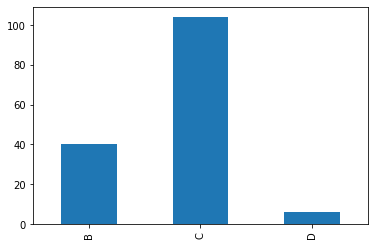

In [ ]:
grade_count.plot.bar()



The height of the bars in this figure represents the number of students who received each letter grade shown on the horizontal axis. The majority of your students got a C letter grade.